##### Mediapipe 人物去背 ( Selfie Segmentation )
這篇教學會使用 MediaPipe 的自拍分割模型 ( Selfie Segmentation ) 偵測人物主體後，\
將背景去除，再透過 OpenCV 讀取攝影鏡頭影像加入虛擬背景，即時將去背的人物與背景合成。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 使用 MediaPipe，偵測人物主體並去背 
Mediapipe Selfie Segmentation 使用基於 MobileNetV3 的模型，可以將場景中的突出人物與背景分離，\
雖然能做到即時的去背效果，但如果是「複雜」的的背景，然後會出現偵測錯誤的狀況，因此仍然建議使用「單純」的背景，\
才能看出比較好的效果 ( 有時甚至需要打光，強化主體人物，達到更好的去背效果 )。

下方的程式碼延伸「[讀取並播放影片](https://steam.oxxostudio.tw/category/python/ai/opencv-read-video.html)」文章的範例，搭配 mediapipe ，偵測人物主體並去背的方法，\
透過攝影鏡頭獲取影像後，將人物和 windows 的經典背景進行合成。

參考：[numpy.where()](https://steam.oxxostudio.tw/category/python/numpy/array-search.html#a1)

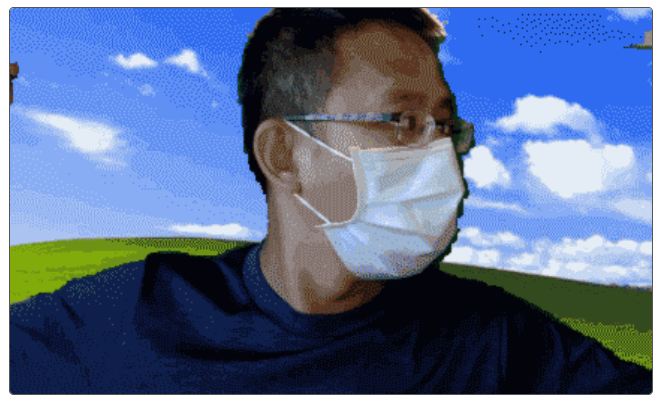

In [ ]:
import cv2
import mediapipe as mp
import numpy as np

# 初始化 mediapipe 的繪圖工具和自拍分割模組
mp_drawing = mp.solutions.drawing_utils                    # mediapipe 繪圖功能
mp_selfie_segmentation = mp.solutions.selfie_segmentation  # mediapipe 自拍分割方法

# 開啟攝影機
cap = cv2.VideoCapture(0)

# 載入背景圖片
bg = cv2.imread(r'Img/Face/Lee_Da_hye/9.jpg')  # 載入背景圖片

# mediapipe 啟用自拍分割
with mp_selfie_segmentation.SelfieSegmentation(
    model_selection=1) as selfie_segmentation:  # 選擇模型，0 或 1，1 為高精度模型

    if not cap.isOpened():
        print("Cannot open camera")  # 無法開啟攝影機
        exit()
    
    while True:
        ret, img = cap.read()  # 讀取攝影機影像
        if not ret:
            print("Cannot receive frame")  # 無法接收影像
            break
        
        img = cv2.resize(img, (800, 1000))  # 縮小尺寸，加快演算速度
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 將 BGR 轉換成 RGB
        
        results = selfie_segmentation.process(img2)  # 取得自拍分割結果
        
        # 根據分割結果建立條件遮罩
        condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
        # 如果滿足模型判斷條件 ( 表示要換成背景 )，回傳 True
        
        # 將主體與背景合成，如果滿足背景條件，就更換為 bg 的像素，不然維持原本的 img 的像素
        output_image = np.where(condition, img, bg)

        cv2.imshow('oxxostudio', output_image)  # 顯示影像
        if cv2.waitKey(5) == ord('q'):
            break  # 按下 q 鍵停止
        
cap.release()  # 釋放攝影機資源
cv2.destroyAllWindows()  # 關閉所有 OpenCV 視窗

參考資料 
* [MediaPipe Selfie Segmentation](https://google.github.io/mediapipe/solutions/selfie_segmentation#python-solution-api)